This is a change. Deanna is addding a change to test.

## Import Libraries

In [1]:
import sys
sys.path.append('/home/sarahd/pyclivac/modules')

from plotter import simple_line_plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Read txt file into Pandas Dataframe

In [2]:
## location and name of txt file
filename = '/home/sbarc/students/nash/test_scripts/MPWC1.txt'
## reads file into a pandas dataframe - sets the header as line 6 (using 0 index)
## skips row 7 as that is unit information
## creates a single datetime column from 2 columns (extremely useful IMO)
df = pd.read_csv(filename, header=6, delim_whitespace=True, skiprows=[7], parse_dates=[['Date_', 'ime']])
df

,Date__ime,Station_ID,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,dew_point_temperature_set_1d,wind_cardinal_direction_set_1d
0,2015-07-17 18:06:00,MPWC1,21.11,66.0,1.34,211,2.68,14.48,SSW
1,2015-07-17 19:06:00,MPWC1,22.78,62.0,1.79,197,3.58,15.09,SSW
2,2015-07-17 20:06:00,MPWC1,23.89,58.0,1.79,208,4.02,15.10,SSW
3,2015-07-17 21:06:00,MPWC1,25.56,52.0,2.23,199,4.02,14.96,SSW
4,2015-07-17 22:06:00,MPWC1,25.00,52.0,2.23,200,4.47,14.44,SSW
5,2015-07-17 23:06:00,MPWC1,25.00,51.0,2.23,207,4.02,14.14,SSW
6,2015-07-18 00:06:00,MPWC1,25.00,53.0,1.79,217,4.02,14.74,SW
7,2015-07-18 01:06:00,MPWC1,23.89,54.0,1.34,221,3.58,13.99,SW
8,2015-07-18 02:06:00,MPWC1,22.22,57.0,0.45,225,2.23,13.26,SW
9,2015-07-18 03:06:00,MPWC1,17.78,72.0,0.00,1.79,12.63,NaN,NaN


In [3]:
# Converting the index as date (need to do this to utilize functionality of resample)
df.index = pd.to_datetime(df.Date__ime)
## resamples data to daily
df_daily = df.resample('D', label='right').mean()
df_daily

,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_gust_set_1,dew_point_temperature_set_1d
Date__ime,,,,,
2015-07-18,23.890000,56.833333,1.935000,3.798333,14.701667
2015-07-19,20.347083,63.666667,1.212083,4.905833,12.732500
2015-07-20,25.207917,58.083333,1.267083,5.402500,16.000952
2015-07-21,25.000000,61.416667,1.899583,5.862083,16.957391
2015-07-22,21.505000,84.291667,0.933750,5.642500,18.571000
2015-07-23,19.142917,91.666667,0.727500,7.082917,17.774118
2015-07-24,18.842500,88.375000,1.287083,4.696667,16.890909
2015-07-25,21.713333,70.875000,1.230417,5.557500,15.992500
2015-07-26,24.652917,48.833333,2.087917,5.427500,12.963913


In [4]:


# def simple_line_plot(df_name, df_loc, title=None, x_label=None,  y_label=None, color='b'):
#     '''Plug and chug a.......... 
#         Parameters
#         ----------
#         df_name: string
#             What data frame name taking data from, name potentially defined in resample (ex: df_daily).  
        
#         df_loc: int
#             What array index of a data frame to graph.
        
#         title: string, optional
        
#         x_label: string, optional
        
#         y_label: string, optional
        
#         color: string, optional
#             Change line color, can also add line styles.
#             Quick reminder of color options: b,g,r,c,m,y,k,w
        
#         Returns
#         -------
#         Line plot of df_name and df_loc entered.
        
#     '''
#     x=df_name.index
#     y=df_name.iloc[:,df_loc]
#     c=color
    
#     plt.plot(x, y, c)
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)

#     plt.xticks(rotation=90)
#     plt.show()

       

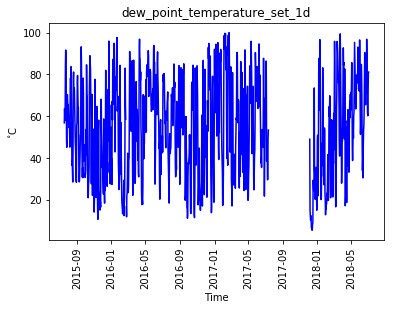

In [5]:
simple_line_plot(df_daily,1,'dew_point_temperature_set_1d','Time','$^{\circ}$C')

In [ ]:
import sys

print(sys.path)

from plotter import simple_line_plot

simple_line_plot(df_daily,1,'dew_point_temperature_set_1d','Time','$^{\circ}$C')

In [ ]:
x=df_daily.index
## Use .iloc to get values from dataframe using indexing [row, column]
y=df_daily.iloc[:,0]
plt.plot(x, y, 'b')
plt.ylabel('$^{\circ}$C')
plt.title('Daily Average Air Temperature')
plt.show()

In [ ]:
## Plot daily air temperature
sns.lineplot(x=df_daily.index, y=df_daily.air_temp_set_1, data=df_daily)